In [1]:
#This notebook analyzes how Bechdel scored movies compare on IMDB Rating of audience.  So are movies with higher bechdel score more or less popular with audeinces?


In [2]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
primary_csv = "../Data/clean_data.csv"


In [4]:
#Reading our base csv data file
primary_df = pd.read_csv(primary_csv)


In [35]:
primary_df.head()

,rating,imdbRating
0,3,7.3
1,1,6.6
2,3,5.8
3,0,5.8
4,3,5.5


In [6]:
#examining how IMDB Rating means differ by bechdel score groups by using groupby function
ratingsgroups = primary_df.groupby(['rating']).mean()
ratingsgroups

,Unnamed: 0,Metascore,Year,imdbRating
rating,,,,
0,3948.343634,62.164921,1981.614339,6.830855
1,3962.753803,60.233083,1995.772958,6.815932
2,4154.273956,59.515748,1991.176904,6.718673
3,4063.262571,59.689961,1998.657630,6.568296


In [7]:
#dropping some columns by retaining columns of need to this analysis
primary_df = primary_df[['rating','imdbRating']]

In [8]:
primary_df.head()

,rating,imdbRating
0,3,7.3
1,1,6.6
2,3,5.8
3,0,5.8
4,3,5.5


In [9]:
#permanent deletion of unnecessary columns
primary_df.dropna(inplace=True)
primary_df.head()

,rating,imdbRating
0,3,7.3
1,1,6.6
2,3,5.8
3,0,5.8
4,3,5.5


In [10]:
#Creating dictionary of 'title font' for plots
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}

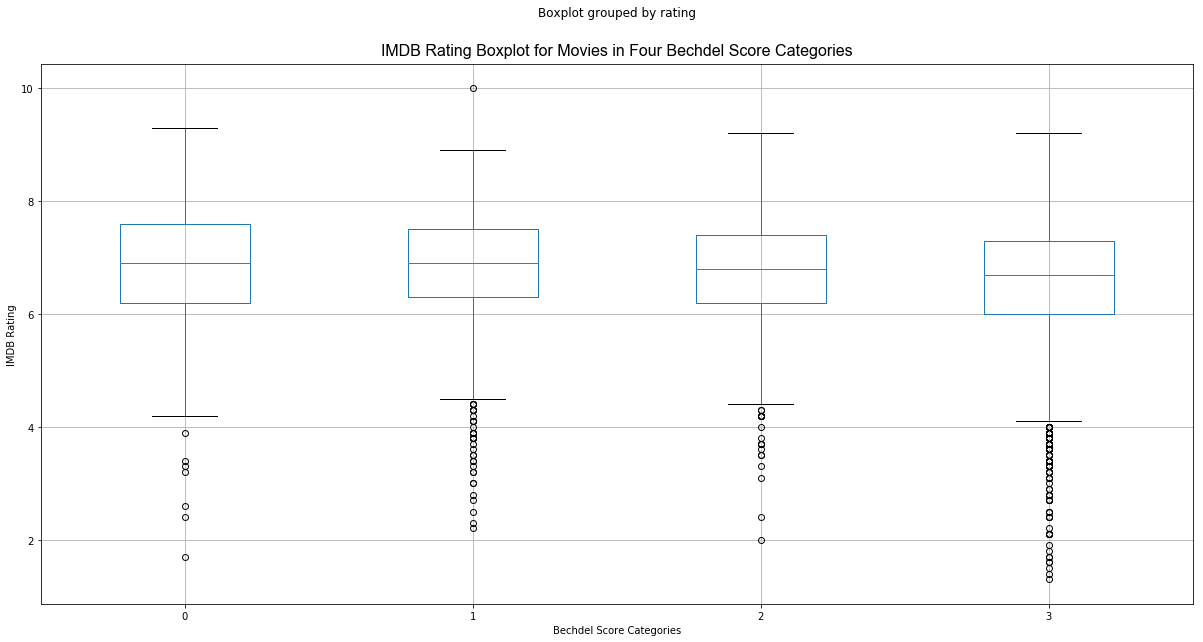

In [11]:
# Create a boxplot to compare means in route to an ANOVA on group differences in IMDB Rating means
primary_df.boxplot("imdbRating", by="rating", figsize=(20, 10))
plt.title('IMDB Rating Boxplot for Movies in Four Bechdel Score Categories', fontdict=title_font)
plt.ylabel('IMDB Rating')
plt.xlabel('Bechdel Score Categories')

plt.savefig('IMDB Rating_boxplot.png')


In [12]:
#Creating groups for the ANOVA
group0 = primary_df[primary_df["rating"] == 0]["imdbRating"]
group1 = primary_df[primary_df["rating"] == 1]["imdbRating"]
group2 = primary_df[primary_df["rating"] == 2]["imdbRating"]
group3 = primary_df[primary_df["rating"] == 3]["imdbRating"]

In [13]:
#ANOVA FTest indicates at least one group mean is significantly different from others (or that not all group means are the same).
stats.f_oneway(group0, group1, group2, group3)

F_onewayResult(statistic=35.662499052552924, pvalue=6.929156902019976e-23)

In [14]:
#Ttest on the two pops with the farthest apart means, bechdel score of zero compared with bechdel score of 3
population1 = primary_df[primary_df["rating"] == 0]


In [15]:
population2 = primary_df[primary_df["rating"] == 3]

In [16]:
#T-test indicates that we should reject null hypothesis of no difference in the means of the IMDB Rating between the two groups (movies scoring zero on bechdel and movies scoring three on bechdel)
stats.ttest_ind(population1.imdbRating, population2.imdbRating, equal_var=False)

Ttest_indResult(statistic=6.783705113617267, pvalue=1.8906237195558985e-11)

In [17]:
#just looking at the data in the next group of cells in this one, overall mean of bechdel score [rating] and IMDB Rating
primary_df.mean()

rating        2.148013
imdbRating    6.665455
dtype: float64

In [36]:
#variable stores mean for each bechdel score group
group0mean = group0.mean()
group0mean

6.830855018587362

In [19]:
group1mean = group1.mean()

In [20]:
group2mean = group2.mean()

In [37]:
group3mean = group3.mean()
group3mean

6.568296426222322

In [22]:
#overall median of bechdel score [rating] and IMDB Rating
primary_df.median()

rating        3.0
imdbRating    6.8
dtype: float64

In [23]:
#We want to look at any anomalies including if the sizes of the groups are very different which may explain difference in means of IMDB Rating
#Altough group three is much larger which is giving us statistical power to discern difference in means, no group has a small n

group0.count()

807

In [24]:
group1.count()

1770

In [25]:
group2.count()

814

In [26]:
group3.count()

4561

In [27]:
#looking at standard devs across groups which are all about the same
group0std = group0.std()
group0std

1.0104673697141513

In [28]:
group1std = group1.std()
group1std

0.9372001383987233

In [29]:
group2std = group2.std()
group2std

0.9725356259588245

In [30]:
group3std = group3.std()
group3std

1.0304120772556715

In [31]:
#creating list of  bechdel score group means of IMDB Rating for plot purposes
means = [group0mean, group1mean, group2mean, group3mean]
means

[6.830855018587362, 6.815932203389836, 6.718673218673222, 6.568296426222322]

In [32]:
#for plotting x axis
bechdel = [0, 1, 2, 3]

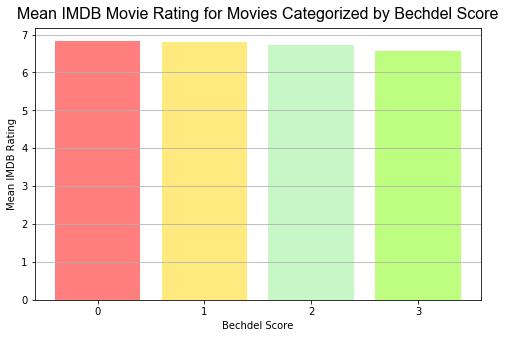

In [33]:
#simple bar chart to display differences in mean IMDB Rating for each of the four bechdel score categories
objects = ('0', '1', '2', '3')

plt.bar(bechdel, means, align='center', alpha=0.5, color=['red', 'gold', 'lightgreen', 'lawngreen'])
plt.xticks(bechdel, objects)
plt.ylabel('Mean IMDB Rating')
plt.xlabel('Bechdel Score')
plt.title('Mean IMDB Movie Rating for Movies Categorized by Bechdel Score', fontdict=title_font)

fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.grid(axis='y')

plt.savefig('IMDB Rating_barchart.png')

plt.show()